In [6]:
from quant_met import plotting, hamiltonians, minimize_free_energy, utils
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
lattice_constant = np.sqrt(3)

all_K_points = 4 * np.pi / (3 * lattice_constant) * np.array([
    (np.sin(i * np.pi / 6), np.cos(i * np.pi / 6)) for i in [1, 3, 5, 7, 9, 11]]
)

Gamma = np.array([0, 0])
M = np.pi / lattice_constant * np.array([1, 1 / np.sqrt(3)])
K = 4 * np.pi / (3 * lattice_constant) * np.array([1, 0])

points = [(M, 'M'), (Gamma, r'\Gamma'), (all_K_points[1], 'K')]

band_path, band_path_plot, ticks, labels = plotting.generate_bz_path(points, number_of_points=1000)

#BZ_path_plot = plotting.scatter_into_bz(all_K_points, band_path)

BZ_grid = utils.generate_uniform_grid(8, 8, all_K_points[1], all_K_points[5], origin=np.array([0, 0]))

In [22]:
egx_h = hamiltonians.EGXHamiltonian(t_gr=1, t_x=0.01, V=1, a=lattice_constant, mu=0, U_x=1, U_gr=6)
beta = 500
solution = minimize_free_energy.minimize_loop(beta=beta, hamiltonian=egx_h, k_points=BZ_grid)

/Users/tjark/Projects/Research/quant-met/src/quant_met/minimize_free_energy.py:20: RuntimeWarning: overflow encountered in exp
  - np.sum(np.log(1 + np.nan_to_num(np.exp(-beta * bdg_energies))), axis=-1)


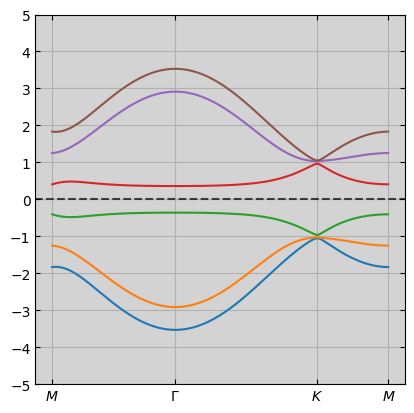

In [23]:
bdg_bands, _ = egx_h.diagonalize_bdg(band_path, solution.x)
bdg_plot = plotting.plot_bandstructure(bands=bdg_bands.T, k_point_list=band_path_plot, ticks=ticks, labels=labels)